Food-101 Dataset Exploration
----------------------------
This notebook explores the Food-101 dataset structure and visualizes sample images.


In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import cv2
import random

# Define dataset path
FOOD101_PATH = "../food-101"

In [2]:
# Explore dataset structure
print(f"Exploring Food-101 dataset at: {FOOD101_PATH}")

# Load class information
classes_file = os.path.join(FOOD101_PATH, "meta", "classes.txt")
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

print(f"Found {len(classes)} food classes")
print(f"Sample classes: {classes[:10]}")

Exploring Food-101 dataset at: ../food-101
Found 101 food classes
Sample classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [3]:
# Load train/test split information
train_file = os.path.join(FOOD101_PATH, "meta", "train.json")
test_file = os.path.join(FOOD101_PATH, "meta", "test.json")

with open(train_file, 'r') as f:
    train_data = json.load(f)

with open(test_file, 'r') as f:
    test_data = json.load(f)

# Count images
train_count = sum(len(items) for items in train_data.values())
test_count = sum(len(items) for items in test_data.values())

print(f"Training images: {train_count}")
print(f"Testing images: {test_count}")
print(f"Total images: {train_count + test_count}")

Training images: 75750
Testing images: 25250
Total images: 101000


In [4]:
# Create a dataframe containing image paths and labels
def create_dataset_df(split_data, split_name):
    image_paths = []
    labels = []
    
    for food_class, items in split_data.items():
        for item in items:
            # In Food-101, images are stored as {class}/{item_id}.jpg
            image_path = os.path.join(FOOD101_PATH, "images", f"{item}.jpg")
            image_paths.append(image_path)
            labels.append(food_class)
    
    df = pd.DataFrame({
        "image_path": image_paths,
        "label": labels,
        "split": split_name
    })
    
    return df

In [5]:
# Create train and test dataframes
train_df = create_dataset_df(train_data, "train")
test_df = create_dataset_df(test_data, "test")

# Combine into one dataframe
food101_df = pd.concat([train_df, test_df], ignore_index=True)

# Verify labels match classes
assert set(food101_df['label'].unique()) == set(classes), "Labels don't match classes list"

print(f"Created dataframe with {len(food101_df)} total images")
print(f"Sample of dataframe:")
print(food101_df.head())

Created dataframe with 101000 total images
Sample of dataframe:
                               image_path    label  split
0  ../food-101/images/churros/1004234.jpg  churros  train
1  ../food-101/images/churros/1013460.jpg  churros  train
2  ../food-101/images/churros/1016791.jpg  churros  train
3   ../food-101/images/churros/102100.jpg  churros  train
4  ../food-101/images/churros/1025494.jpg  churros  train


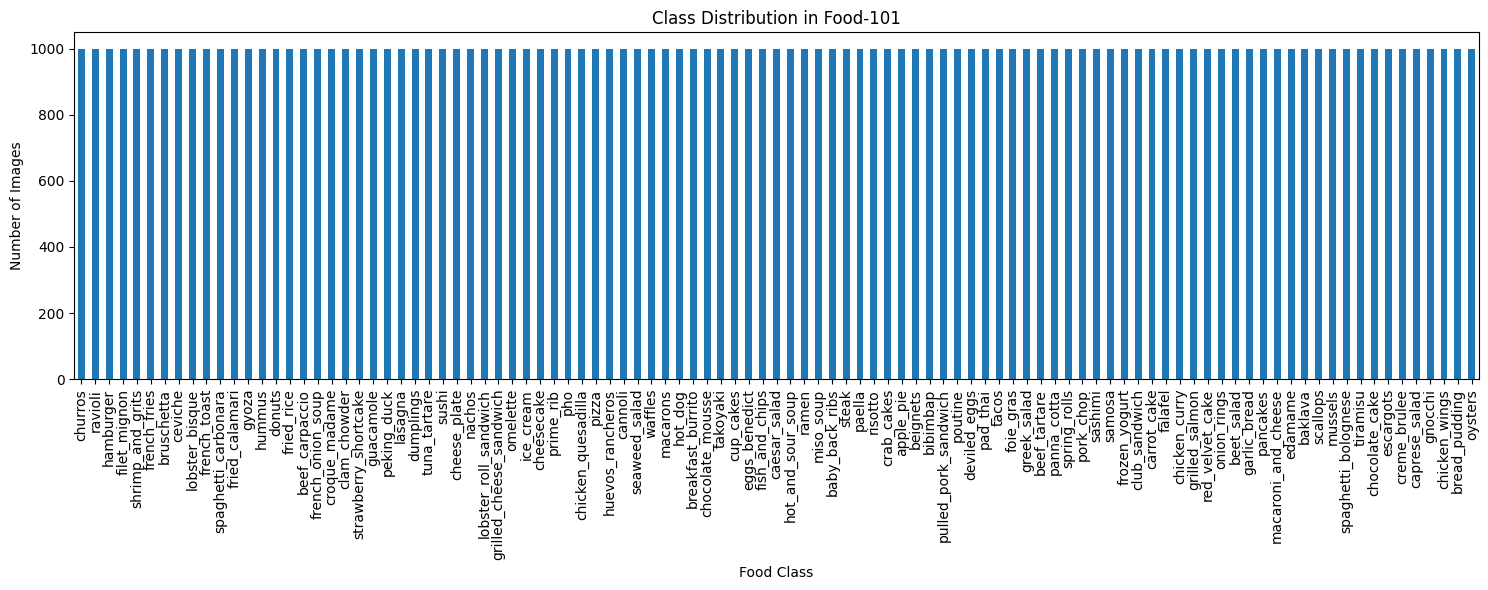

In [6]:
# Visualize class distribution
plt.figure(figsize=(15, 6))
class_counts = food101_df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution in Food-101')
plt.ylabel('Number of Images')
plt.xlabel('Food Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

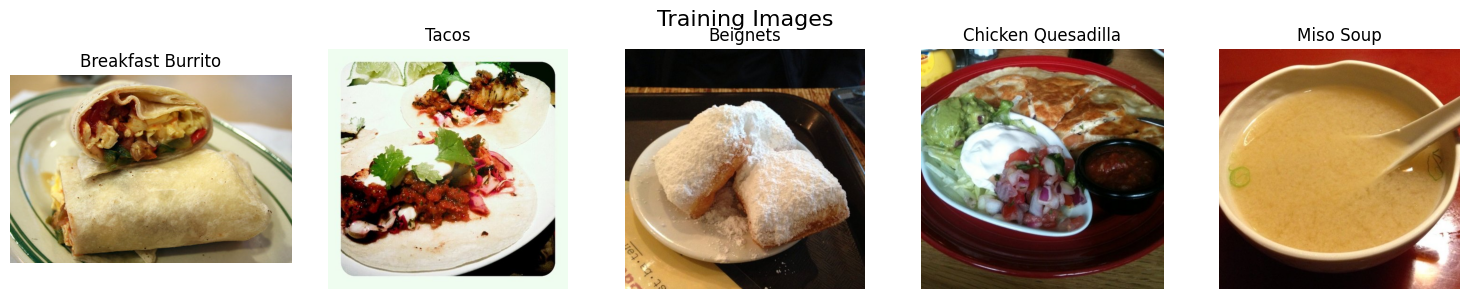

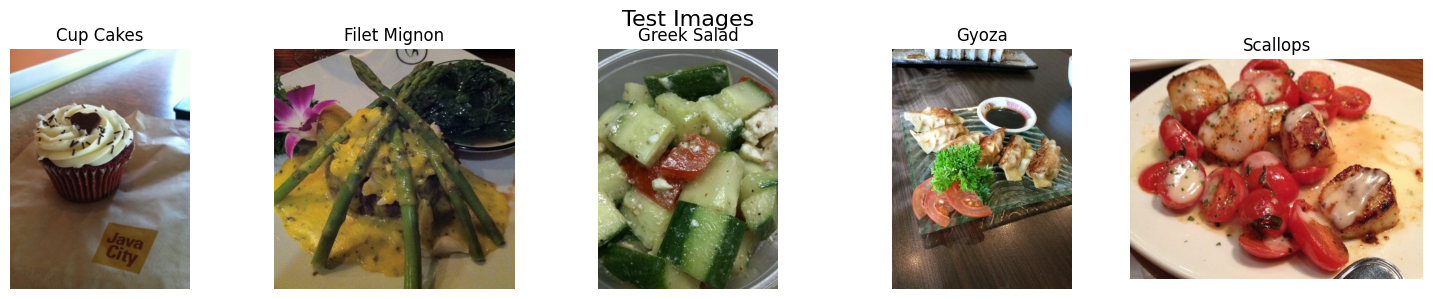

In [7]:
# Display sample images
def show_sample_images(df, n=5, random_state=None):
    """Display sample images from dataframe"""
    if random_state is not None:
        random.seed(random_state)
    
    # Sample from each split
    train_samples = df[df['split'] == 'train'].sample(min(n, len(df[df['split'] == 'train'])))
    test_samples = df[df['split'] == 'test'].sample(min(n, len(df[df['split'] == 'test'])))
    
    # Display train samples
    plt.figure(figsize=(15, 3))
    plt.suptitle('Training Images', fontsize=16)
    
    for i, (_, row) in enumerate(train_samples.iterrows()):
        img = cv2.imread(row['image_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(row['label'].replace('_', ' ').title())
        plt.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    # Display test samples
    plt.figure(figsize=(15, 3))
    plt.suptitle('Test Images', fontsize=16)
    
    for i, (_, row) in enumerate(test_samples.iterrows()):
        img = cv2.imread(row['image_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(row['label'].replace('_', ' ').title())
        plt.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Show sample images
show_sample_images(food101_df, n=5, random_state=42)


In [8]:
# Check for missing images
def check_missing_images(df):
    missing = 0
    for path in df['image_path']:
        if not os.path.exists(path):
            missing += 1
    return missing

missing_count = check_missing_images(food101_df)
print(f"Missing images: {missing_count}")

Missing images: 0


In [9]:
# Save processed dataframe for use in other notebooks
food101_df.to_pickle("../data/food101_df.pkl")
print("Saved dataset to ../data/food101_df.pkl")

Saved dataset to ../data/food101_df.pkl


In [10]:
# Verify image dimensions
def get_image_dimensions(image_path):
    img = cv2.imread(image_path)
    return img.shape

# Sample a few images to check dimensions
sample_images = food101_df['image_path'].sample(5).tolist()
for img_path in sample_images:
    dims = get_image_dimensions(img_path)
    print(f"Image dimensions: {dims}")

print("Data exploration complete!")

Image dimensions: (382, 512, 3)
Image dimensions: (512, 512, 3)
Image dimensions: (512, 512, 3)
Image dimensions: (512, 512, 3)
Image dimensions: (512, 512, 3)
Data exploration complete!
